In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'F:\\Dino\\UCB-USACE-LSTMs\\UCB_training\\models\\hopland_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [5]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'hopland_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("hopland")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all
Train Basin File Exists: True


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("hopland_gage.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [8]:
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

In [9]:
lstmNoPhysicsDaily.train()

2025-02-12 10:37:41,011: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103740\output.log initialized.
2025-02-12 10:37:41,011: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103740
2025-02-12 10:37:41,011: ### Run configurations for testing_run
2025-02-12 10:37:41,011: experiment_name: testing_run
2025-02-12 10:37:41,011: train_basin_file: hopland
2025-02-12 10:37:41,027: validation_basin_file: hopland
2025-02-12 10:37:41,027: test_basin_file: hopland
2025-02-12 10:37:41,027: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:37:41,039: train_end_date: 2002-09-30 00:00:00
2025-02-12 10:37:41,041: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:37:41,044: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:37:41,045: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:37:41,047: test_end_date: 2009-09-29 00:00:00
2025-02-12 10:37:41,049: device: cpu
2025-02-12 10:37:41,0

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]
2025-02-12 10:37:57,338: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103740\validation\model_epoch008\validation_metrics.csv
2025-02-12 10:37:57,341: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103740\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_103740')

got predictions


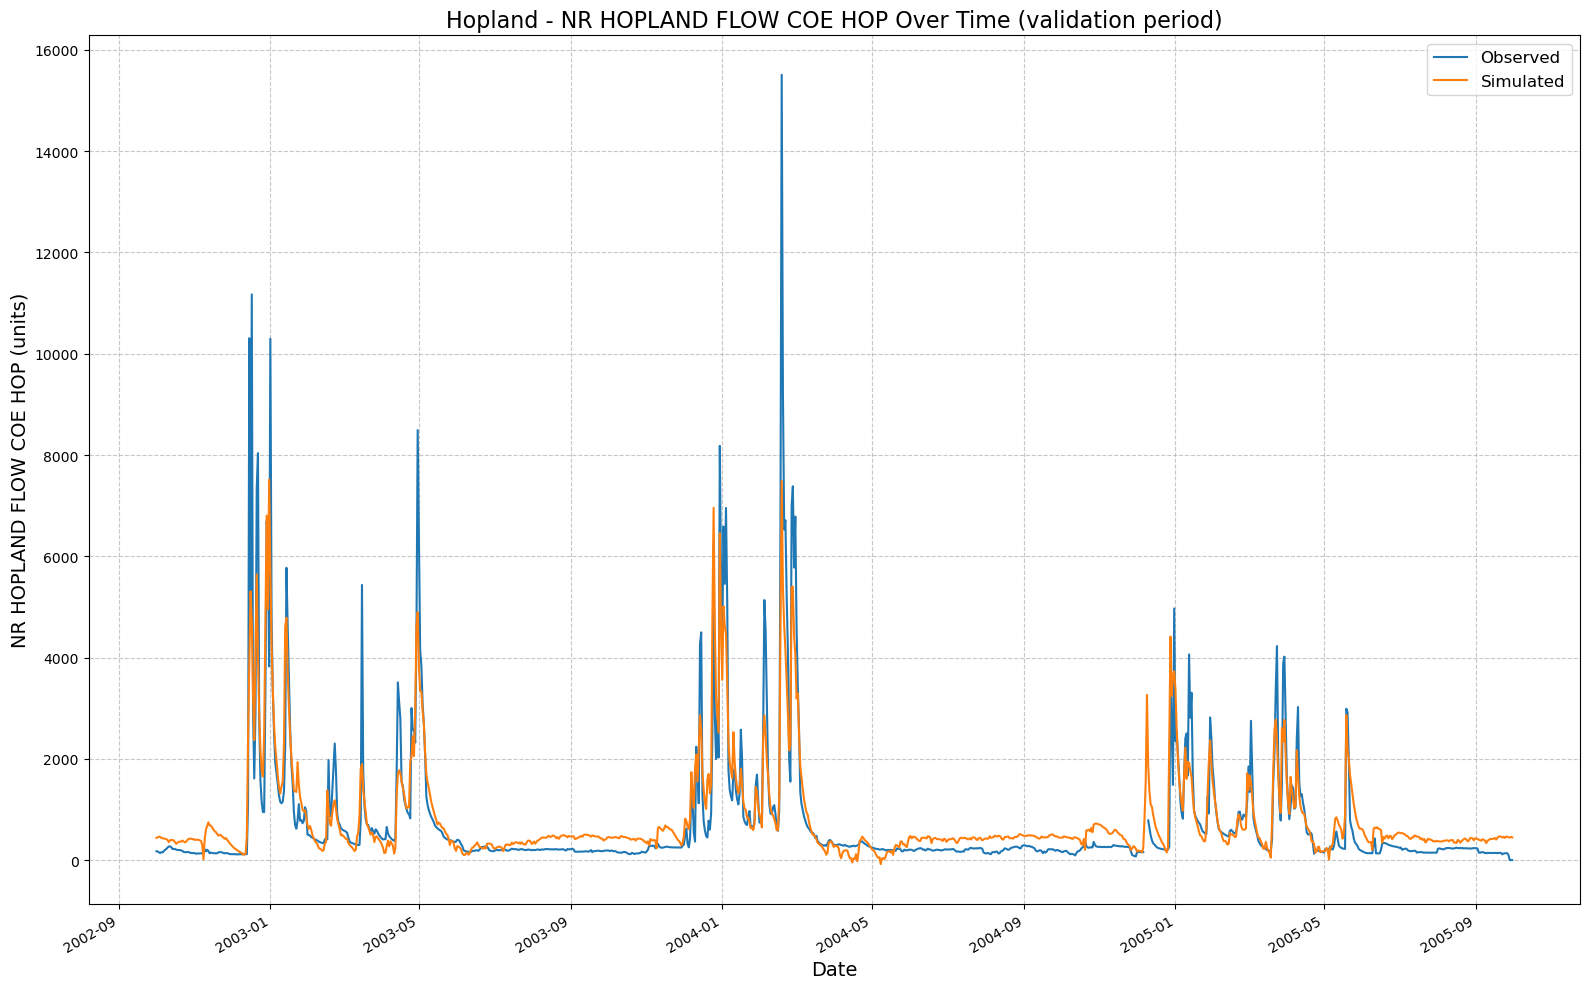

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103740\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [25]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily_results_path_csv, lstmNoPhysicsDaily_results_metrics = lstmNoPhysicsDaily.results() 

## Physics-Informed LSTM (PLSTM) trained on training set, validated on validation set


In [12]:
path_to_physics_data = Path(library_path +"/russian_river_data/Hopland_daily.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [21]:
lstmPhysicsDaily_results_path_csv, lstmPhysicsDaily_results_metrics = lstmPhysicsDaily.train()

2025-02-12 10:40:49,927: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103758\testing_run_1202_104049\output.log initialized.
2025-02-12 10:40:49,927: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103758\testing_run_1202_104049
2025-02-12 10:40:49,936: ### Run configurations for testing_run
2025-02-12 10:40:49,936: experiment_name: testing_run
2025-02-12 10:40:49,936: train_basin_file: hopland
2025-02-12 10:40:49,943: validation_basin_file: hopland
2025-02-12 10:40:49,946: test_basin_file: hopland
2025-02-12 10:40:49,948: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:40:49,950: train_end_date: 2002-09-30 00:00:00
2025-02-12 10:40:49,951: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:40:49,955: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:40:49,957: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:40:49,961: test_end_date: 2009-09-29 00:00:00
2025-02-12

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
2025-02-12 10:41:02,851: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103758\testing_run_1202_104049\validation\model_epoch008\validation_metrics.csv
2025-02-12 10:41:02,855: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103758\testing_run_1202_104049\validation\model_epoch008\validation_results.p


TypeError: cannot unpack non-iterable WindowsPath object

got predictions


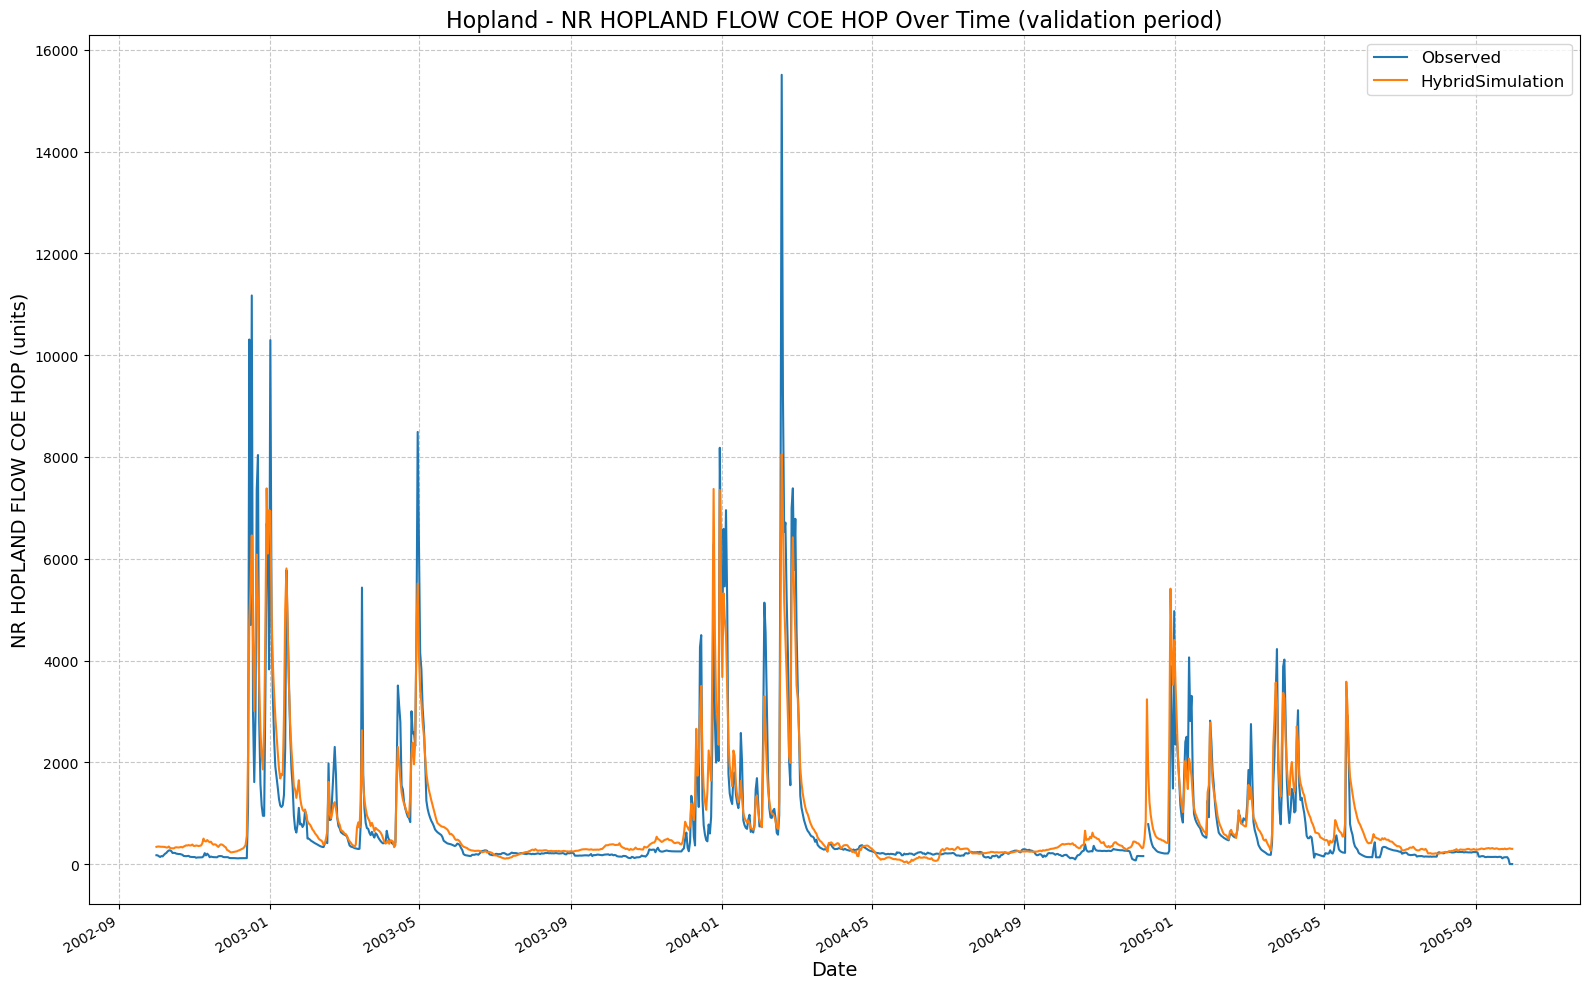

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_103758\testing_run_1202_104049\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [27]:
lstmPhysicsDaily_results_path_csv, lstmPhysicsDaily_results_metrics = lstmPhysicsDaily.results()

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future ver

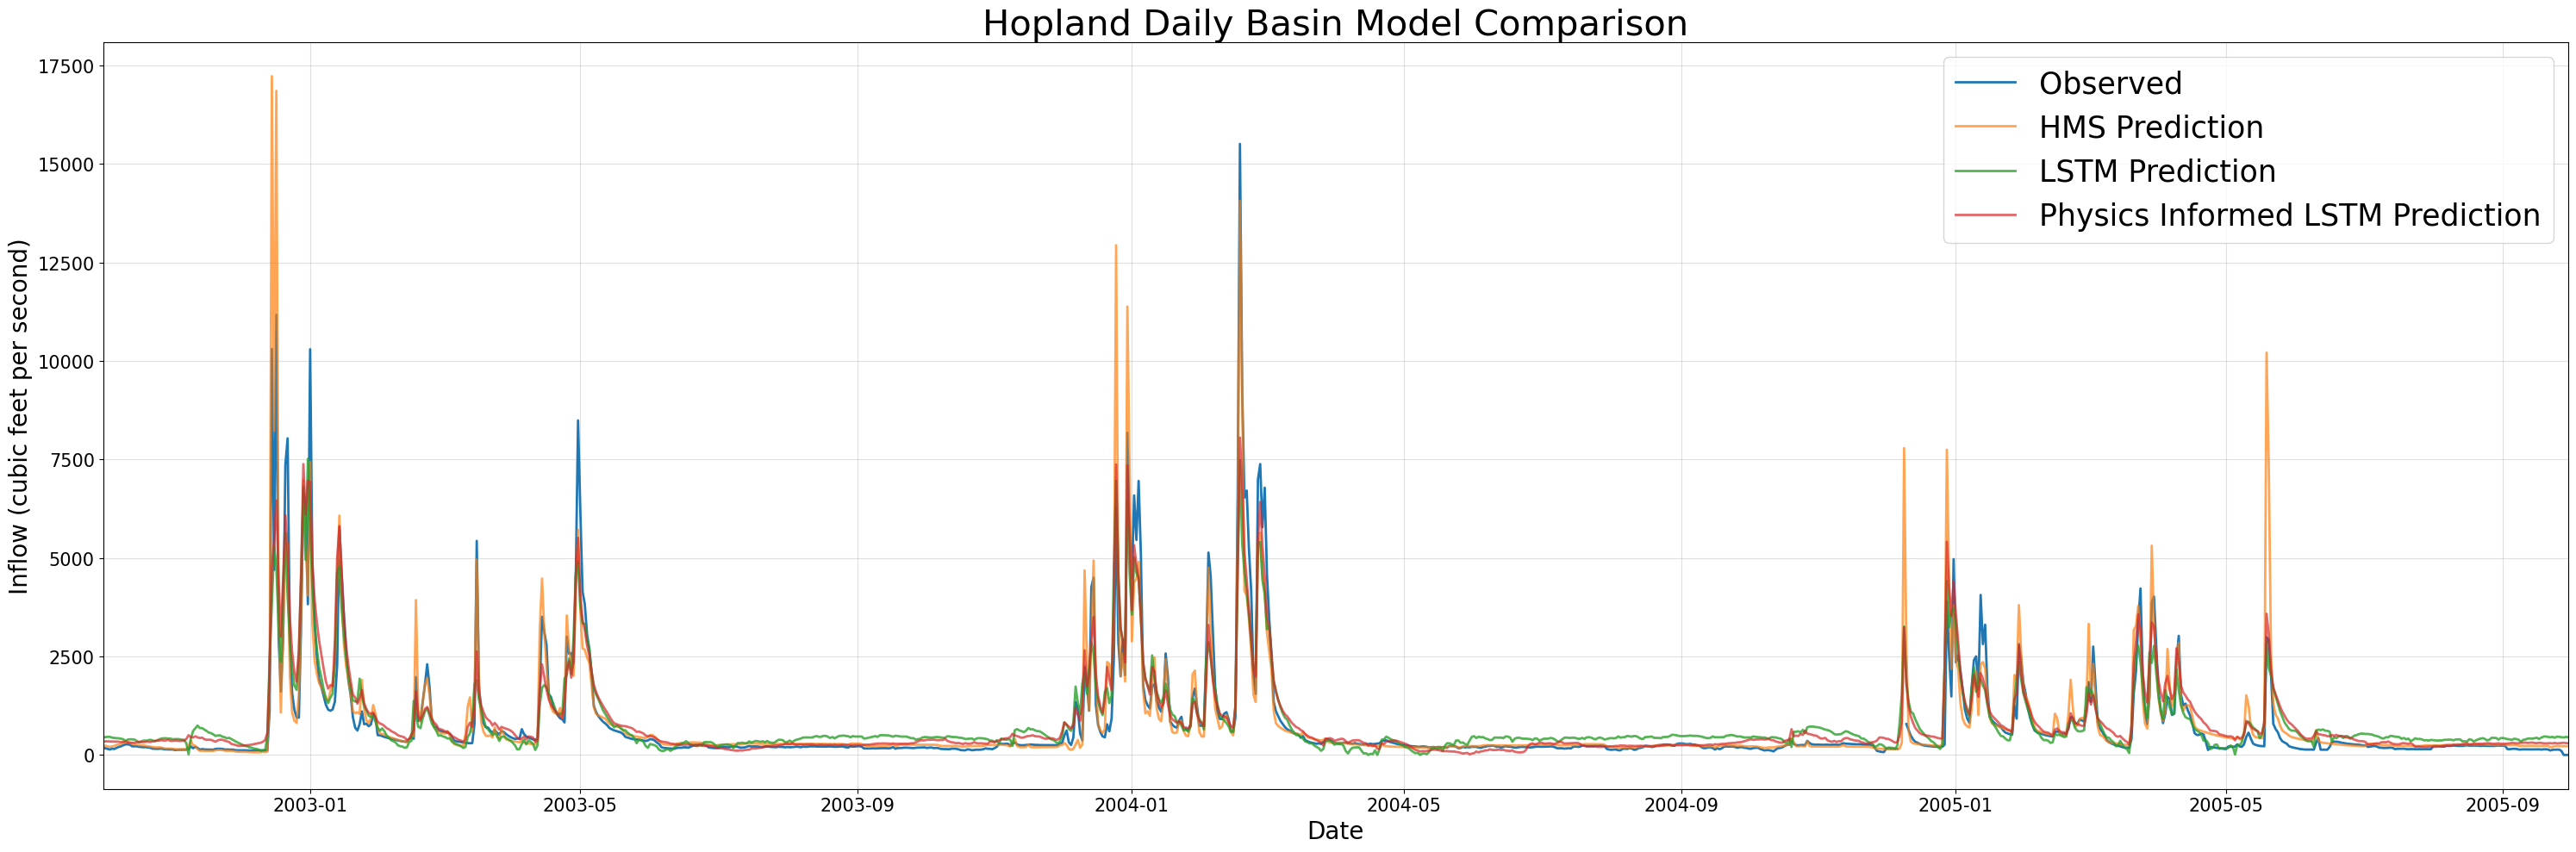

In [29]:
lstm_results_path = lstmNoPhysicsDaily_results_path_csv
lstmPhysics_results_path = lstmPhysicsDaily_results_path_csv
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Hopland Daily Basin Model Comparison', fName = "hopland_daily_eval_metrics.csv")

In [31]:
metrics_df

HMS           LSTM  Physics_Informed_LSTM
NSE               0.797363       0.776812               0.835675
MSE          389482.349874  428982.533508          315845.260938
RMSE            624.085210     654.967582             562.001122
KGE               0.875456       0.692818               0.770861
Alpha-NSE         1.062098       0.724492               0.816966
Beta-KGE          1.054547       1.092054               1.113856
Beta-NSE          0.029693       0.050109               0.061977
Pearson-r         0.906836       0.900087               0.922284
FHV               6.805006     -31.083331             -22.621807
FMS              -5.549918     -33.047382              -7.716771
FLV              94.270876      -2.398837              86.497095
Peak-Timing       0.000000       0.400000               0.200000
Peak-MAPE        24.485552      44.489422              31.593723

## If you prefer the interactive plotly graph , you can use 'fancyCombinedPlot' (must have plotly library downloaded)

In [34]:
path_to_physics_data = Path(library_path +"/russian_river_data/Hopland_daily.csv")

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future ver

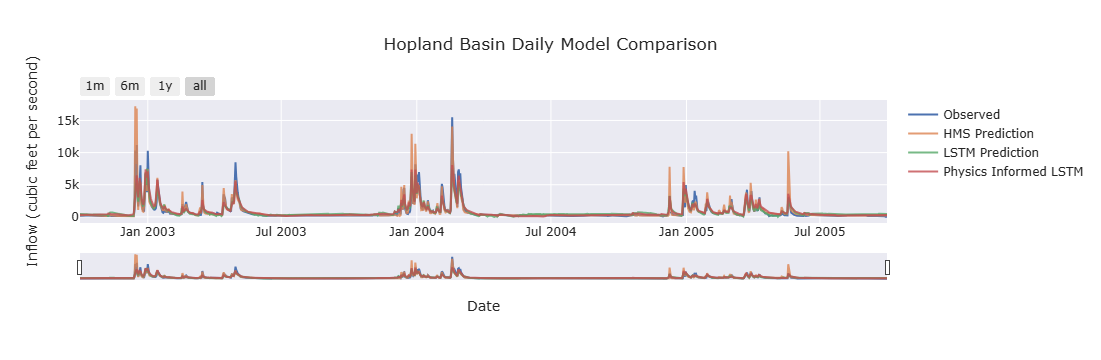

HMS           LSTM  Physics_Informed_LSTM
NSE               0.797363       0.776812               0.835675
MSE          389482.349874  428982.533508          315845.260938
RMSE            624.085210     654.967582             562.001122
KGE               0.875456       0.692818               0.770861
Alpha-NSE         1.062098       0.724492               0.816966
Beta-KGE          1.054547       1.092054               1.113856
Beta-NSE          0.029693       0.050109               0.061977
Pearson-r         0.906836       0.900087               0.922284
FHV               6.805006     -31.083331             -22.621807
FMS              -5.549918     -33.047382              -7.716771
FLV              94.270876      -2.398837              86.497095
Peak-Timing       0.000000       0.400000               0.200000
Peak-MAPE        24.485552      44.489422              31.593723

In [36]:
fancyCombinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Hopland Basin Daily Model Comparison', fName = "hopland_daily_eval_metrics.csv")

## Re-train standard daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [39]:
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [41]:
lstmNoPhysicsDailyExt.train()

2025-02-12 10:43:17,285: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\output.log initialized.
2025-02-12 10:43:17,288: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317
2025-02-12 10:43:17,291: ### Run configurations for testing_run
2025-02-12 10:43:17,293: experiment_name: testing_run
2025-02-12 10:43:17,296: train_basin_file: hopland
2025-02-12 10:43:17,299: validation_basin_file: hopland
2025-02-12 10:43:17,301: test_basin_file: hopland
2025-02-12 10:43:17,303: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:43:17,304: train_end_date: 2005-09-30 00:00:00
2025-02-12 10:43:17,306: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:43:17,308: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:43:17,310: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:43:17,312: test_end_date: 2009-09-29 00:00:00
2025-02-12 10:43:17,312: device: cpu
2025-02-12 10:43:17,3

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]
2025-02-12 10:43:48,085: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\validation\model_epoch016\validation_metrics.csv
2025-02-12 10:43:48,088: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_104317')

2025-02-12 10:43:54,717: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]
2025-02-12 10:43:55,299: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\test\model_epoch016\test_metrics.csv
2025-02-12 10:43:55,308: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\test\model_epoch016\test_results.p
got predictions


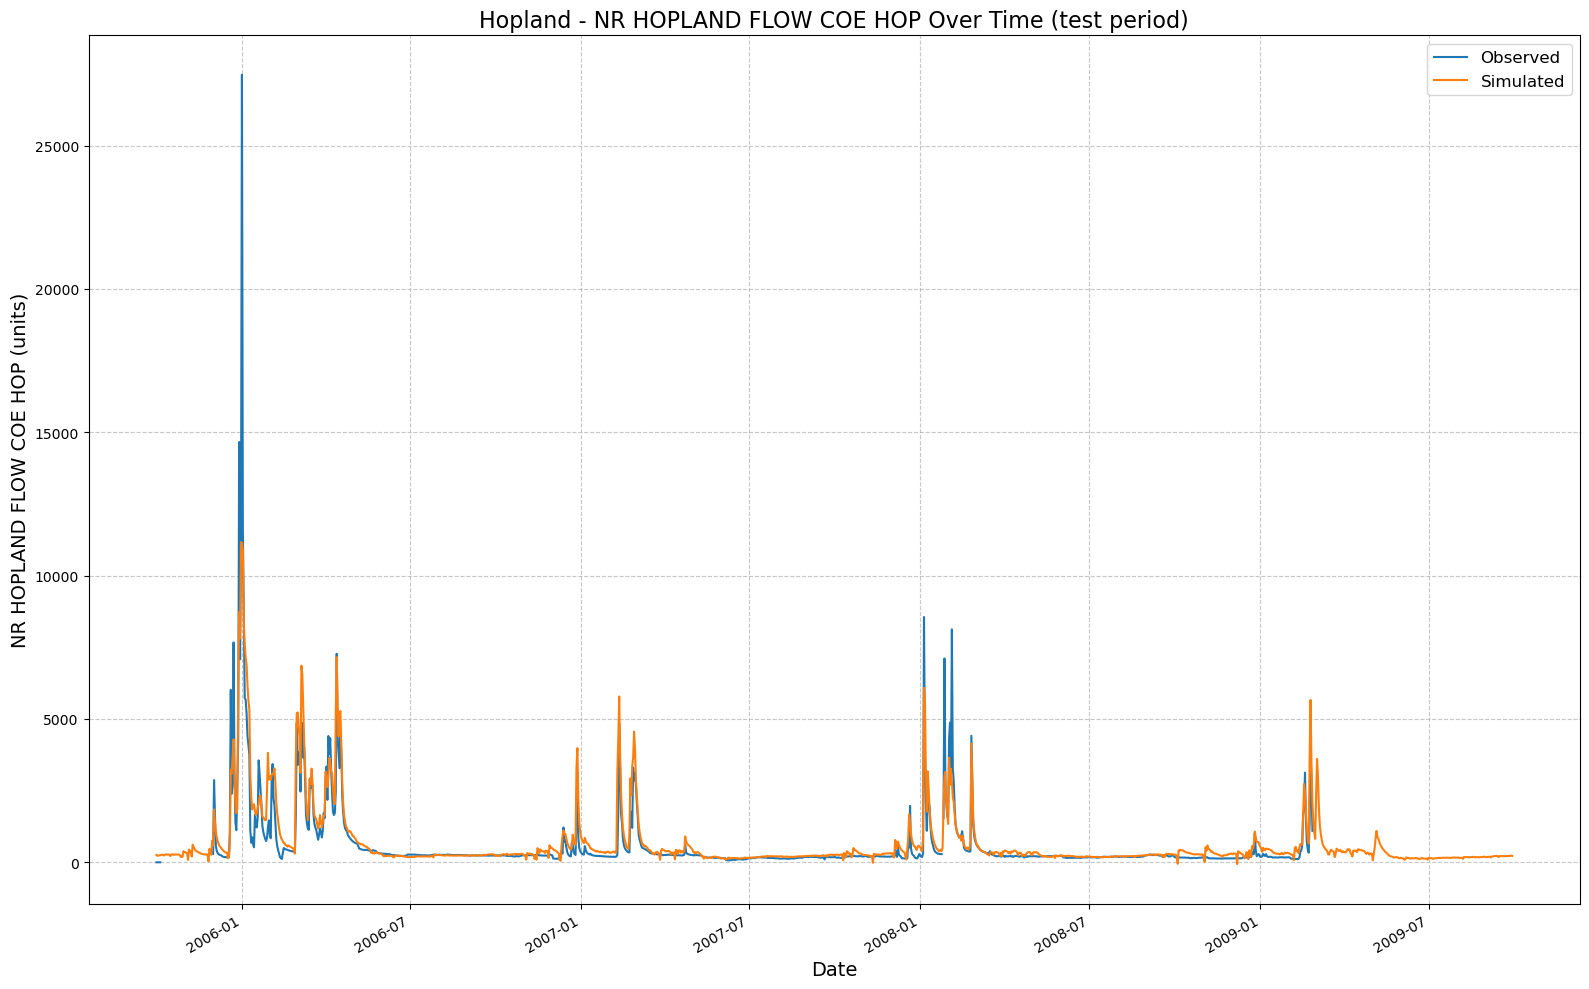

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104317\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [43]:
lstmNoPhysicsDailyExt_results_path_csv, lstmNoPhysicsDailyExt_results_metrics = lstmNoPhysicsDailyExt.results('test')

## Re-train physics daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [46]:
path_to_physics_data = Path(library_path +"/russian_river_data/Hopland_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
    ]
lstmPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [48]:
lstmPhysicsDailyExt.train()

2025-02-12 10:44:06,141: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\output.log initialized.
2025-02-12 10:44:06,144: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406
2025-02-12 10:44:06,146: ### Run configurations for testing_run
2025-02-12 10:44:06,148: experiment_name: testing_run
2025-02-12 10:44:06,151: train_basin_file: hopland
2025-02-12 10:44:06,154: validation_basin_file: hopland
2025-02-12 10:44:06,157: test_basin_file: hopland
2025-02-12 10:44:06,160: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:44:06,162: train_end_date: 2005-09-30 00:00:00
2025-02-12 10:44:06,163: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:44:06,165: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:44:06,166: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:44:06,171: test_end_date: 2009-09-29 00:00:00
2025-02-12 10:44:06,173: device: cpu
2025-02-12 10:44:06,1

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
2025-02-12 10:44:35,407: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\validation\model_epoch016\validation_metrics.csv
2025-02-12 10:44:35,410: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/hopland_all/runs/testing_run_1202_104406')

2025-02-12 10:44:37,296: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
2025-02-12 10:44:38,287: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\test\model_epoch016\test_metrics.csv
2025-02-12 10:44:38,290: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\test\model_epoch016\test_results.p
got predictions


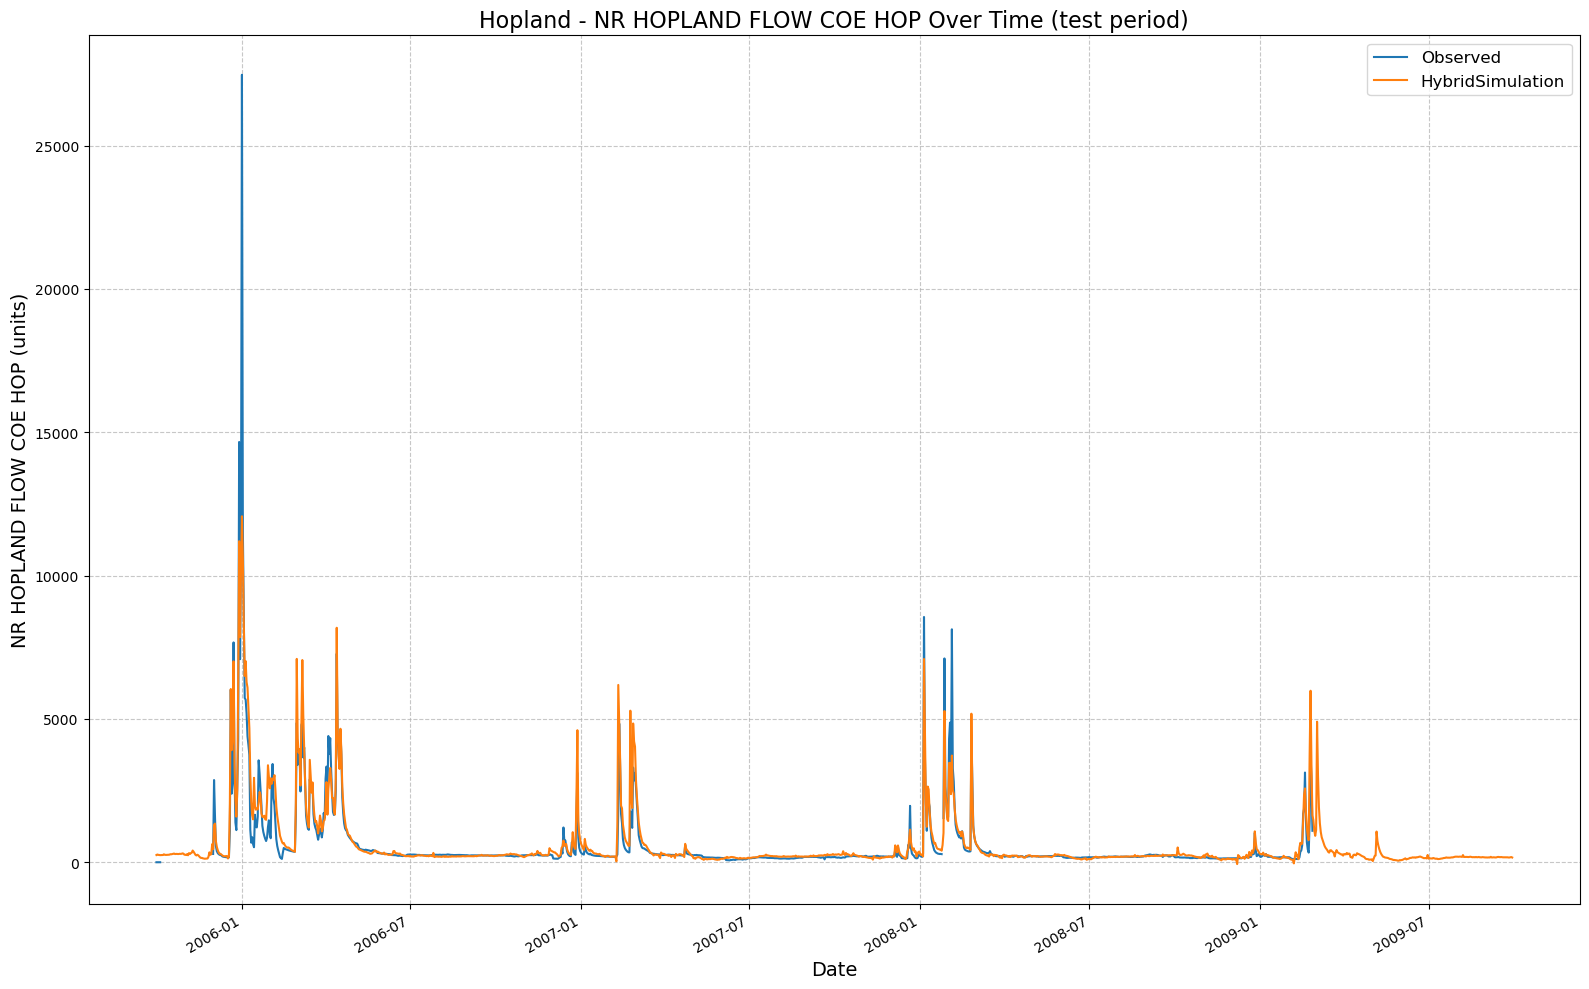

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\runs\testing_run_1202_104406\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [50]:
lstmPhysicsDailyExt_results_path_csv, lstmPhysicsDailyExt_results_metrics = lstmPhysicsDailyExt.results('test')

## compare results

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neural

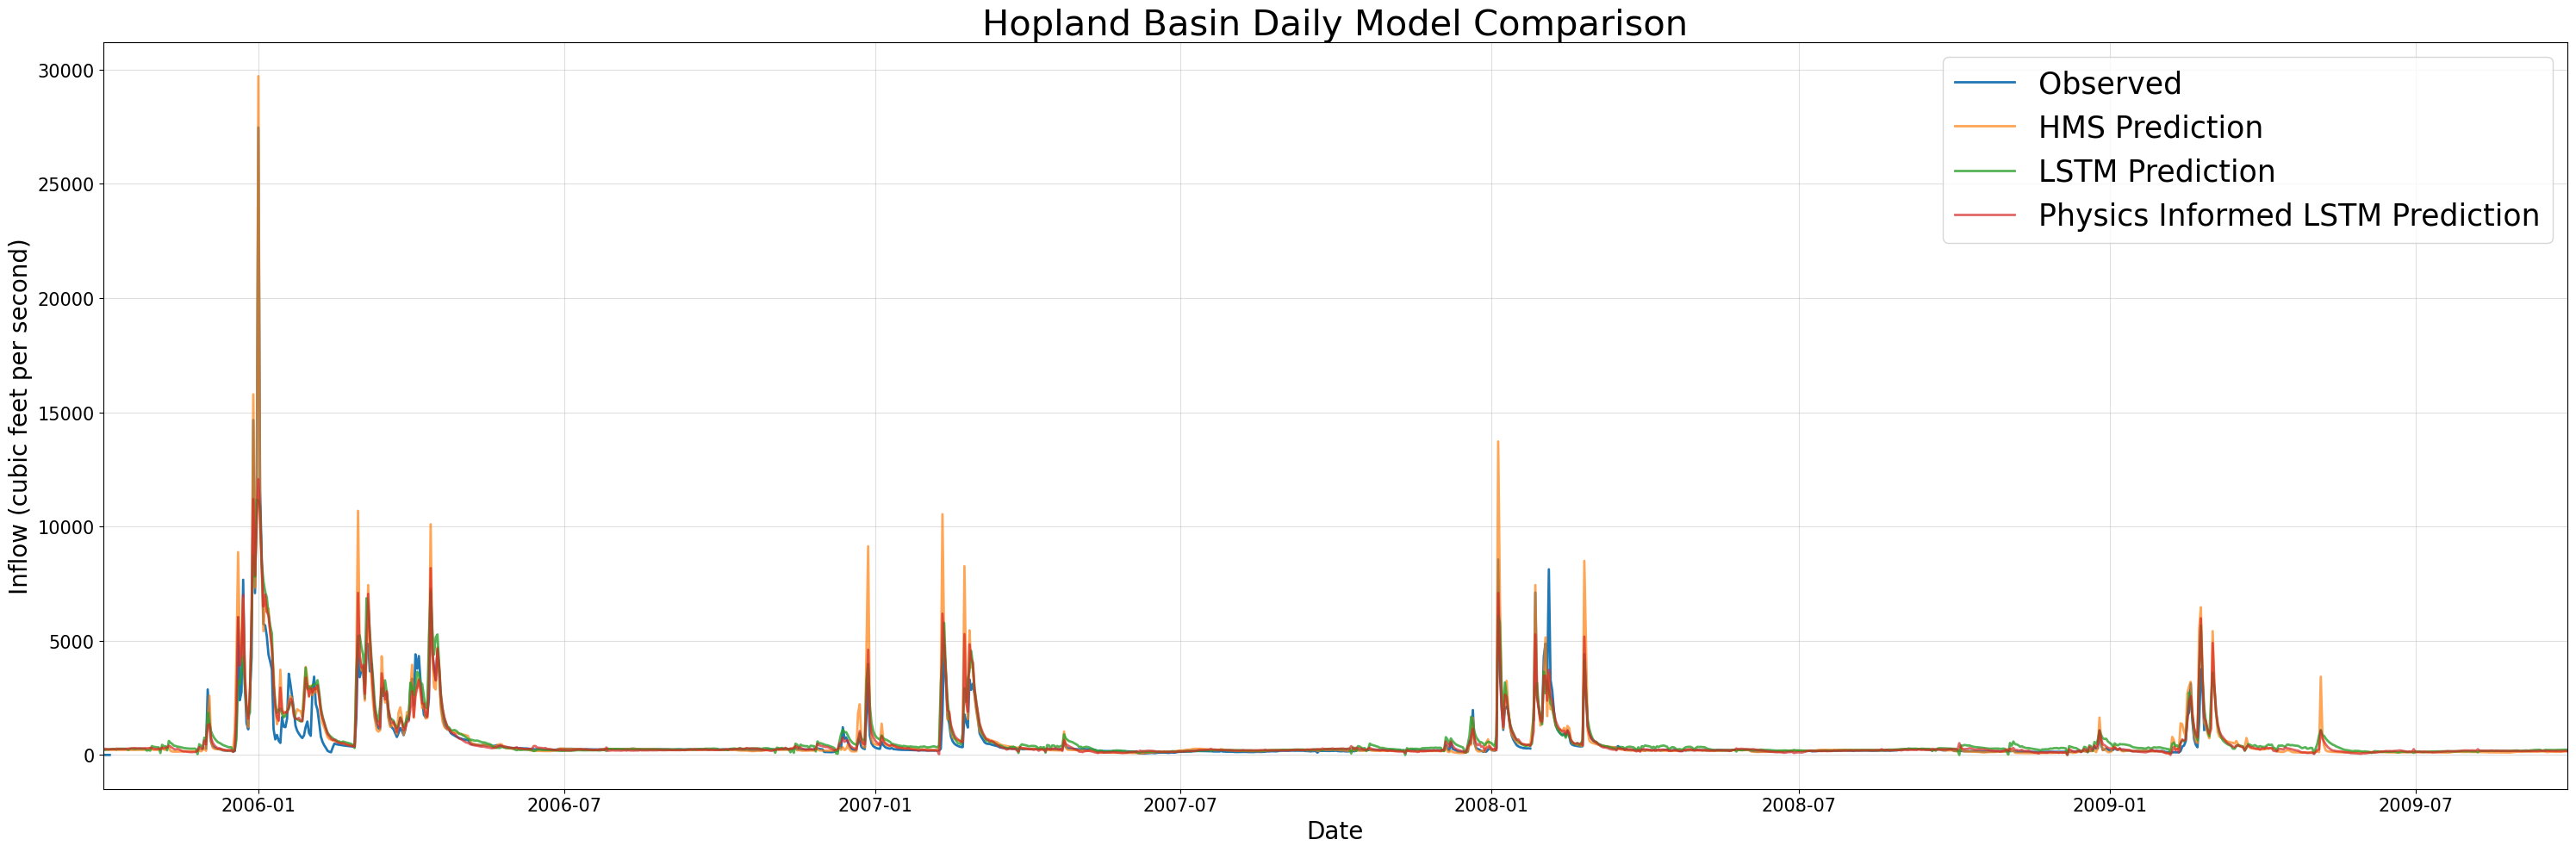

In [53]:
lstm_results_path_ext = lstmNoPhysicsDailyExt_results_path_csv
lstmPhysics_results_path_ext = lstmPhysicsDailyExt_results_path_csv
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Hopland Basin Daily Model Comparison', fName = "hopland_daily_metrics.csv")

In [55]:
metrics_df

HMS           LSTM  Physics_Informed_LSTM
NSE               0.795548       0.758020               0.814889
MSE          404643.882769  478916.972990          366365.454745
RMSE            636.116249     692.038274             605.281302
KGE               0.728187       0.726549               0.822631
Alpha-NSE         1.186227       0.876098               0.890318
Beta-KGE          1.185632       1.209463               1.100928
Beta-NSE          0.079942       0.090205               0.043464
Pearson-r         0.931134       0.875304               0.903859
FHV              23.945896      -8.448992              -5.722685
FMS              30.814334      26.421168              24.376408
FLV              95.333285     -30.210751             -29.362455
Peak-Timing       0.250000       0.250000               0.250000
Peak-MAPE        36.378148      32.047538              29.016151

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\hopland_all\..\..\..\..\UCB-USACE-LSTMs\neural

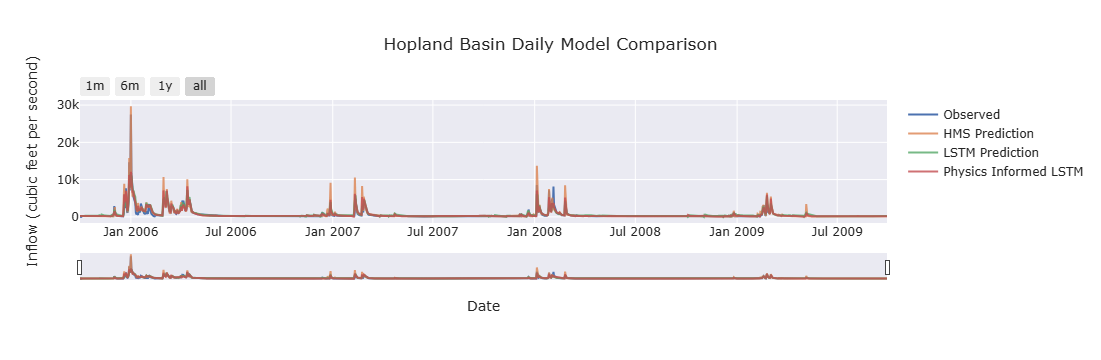

HMS           LSTM  Physics_Informed_LSTM
NSE               0.795548       0.758020               0.814889
MSE          404643.882769  478916.972990          366365.454745
RMSE            636.116249     692.038274             605.281302
KGE               0.728187       0.726549               0.822631
Alpha-NSE         1.186227       0.876098               0.890318
Beta-KGE          1.185632       1.209463               1.100928
Beta-NSE          0.079942       0.090205               0.043464
Pearson-r         0.931134       0.875304               0.903859
FHV              23.945896      -8.448992              -5.722685
FMS              30.814334      26.421168              24.376408
FLV              95.333285     -30.210751             -29.362455
Peak-Timing       0.250000       0.250000               0.250000
Peak-MAPE        36.378148      32.047538              29.016151

In [57]:
fancyCombinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Hopland Basin Daily Model Comparison', fName = "hopland_daily_metrics.csv")